In [11]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

# read data into a DataFrame
data = pd.read_csv('SF Listings - Ex Zillow.csv', index_col=0)
del data['Term']
del data['URL']
del data['Source']
del data['Rented']
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Neighborhood,Bedrooms,Bathrooms,Price,Sqft,Date
Address,,,,,,
539 Octavia Street #9,Hayes Valley,0,1,1500,180,2015-03-18
539 Octavia Street #11,Hayes Valley,0,1,1600,200,2015-03-30
539 Octavia Street #14,Hayes Valley,0,1,1850,221,2015-05-14
539 Octavia Street #12,Hayes Valley,0,1,1800,240,2015-04-16
539 Octavia Street #13,Hayes Valley,0,1,1995,280,2015-02-01


In [12]:
# create year dummy variables (because date isn't very intuitive variable)
data["Year"] = pd.DatetimeIndex(data["Date"]).to_period('Y')

# create dummy variables using get_dummies, then exclude the first dummy column
year_dummies = pd.get_dummies(data.Year, prefix='Year').iloc[:, :-1]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, year_dummies], axis=1)

data.head()

,Neighborhood,Bedrooms,Bathrooms,Price,Sqft,Date,Year,Year_2011,Year_2012,Year_2013,Year_2014
Address,,,,,,,,,,,
539 Octavia Street #9,Hayes Valley,0,1,1500,180,2015-03-18,2015,0,0,0,0
539 Octavia Street #11,Hayes Valley,0,1,1600,200,2015-03-30,2015,0,0,0,0
539 Octavia Street #14,Hayes Valley,0,1,1850,221,2015-05-14,2015,0,0,0,0
539 Octavia Street #12,Hayes Valley,0,1,1800,240,2015-04-16,2015,0,0,0,0
539 Octavia Street #13,Hayes Valley,0,1,1995,280,2015-02-01,2015,0,0,0,0


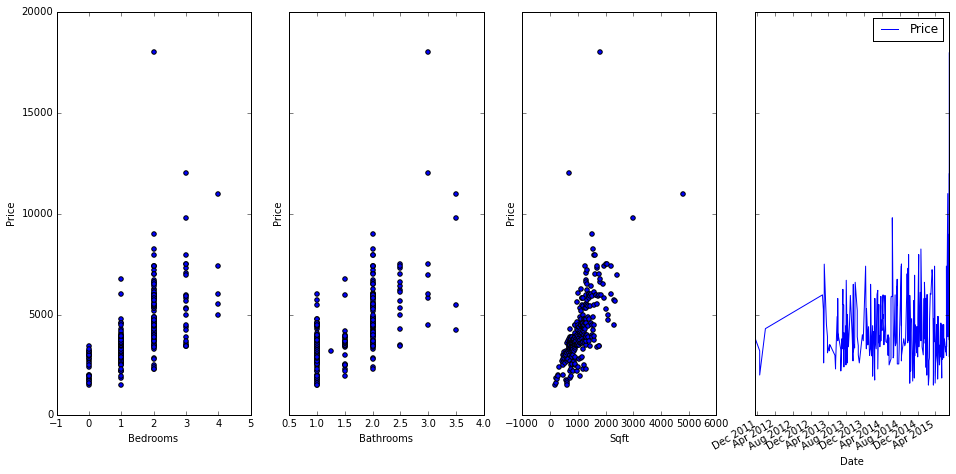

In [13]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True)
data.plot(kind='scatter', x='Bedrooms', y='Price', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Bathrooms', y='Price', ax=axs[1])
data.plot(kind='scatter', x='Sqft', y='Price', ax=axs[2])
data.plot(x='Date', y='Price', ax=axs[3])

In [14]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = list(set(data.columns) - set(['Year','Neighborhood','Date','Price','Sqft']))

X = data[feature_cols]
y = data.Price

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
print lm.intercept_
zip(feature_cols, lm.coef_)


1570.8861577


[('Bathrooms', 1349.8633496659022),
 ('Bedrooms', 563.28263030205653),
 (u'Year_2012', -1772.1097924670969),
 (u'Year_2013', -600.01426774885999),
 (u'Year_2011', -296.27126089882728),
 (u'Year_2014', -315.09032536814982)]

In [15]:
import numpy as np
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((lm.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(X, y))

Residual sum of squares: 1661838.25
Variance score: 0.47


In [16]:

# create dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Neighborhood, prefix='Neighborhood').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,Neighborhood,Bedrooms,Bathrooms,Price,Sqft,Date,Year,Year_2011,Year_2012,Year_2013,...,Neighborhood_South Beach,Neighborhood_South Financial District,Neighborhood_Telegraph Hill,Neighborhood_Van Ness-Civic Center,Neighborhood_Visitacion Valley,Neighborhood_Walnut Creek,Neighborhood_West Oakland,Neighborhood_Western Addition,Neighborhood_Westwood Park,Neighborhood_Yerba Buena
Address,,,,,,,,,,,,,,,,,,,,,
539 Octavia Street #9,Hayes Valley,0,1,1500,180,2015-03-18,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539 Octavia Street #11,Hayes Valley,0,1,1600,200,2015-03-30,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539 Octavia Street #14,Hayes Valley,0,1,1850,221,2015-05-14,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539 Octavia Street #12,Hayes Valley,0,1,1800,240,2015-04-16,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539 Octavia Street #13,Hayes Valley,0,1,1995,280,2015-02-01,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# create X and y
feature_cols = list(set(data.columns) - set(['Year','Neighborhood','Date','Price','Sqft']))

X = data[feature_cols]
y = data.Price

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
print lm.intercept_
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((lm.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(X, y))
zip(feature_cols, lm.coef_)

2208.53889993
Residual sum of squares: 993829.82
Variance score: 0.68


[('Neighborhood_Buena Vista', -733.0460139455945),
 ('Neighborhood_Nob Hill', -183.87288785423925),
 ('Neighborhood_Mission Dolores', -208.17285373980076),
 ('Neighborhood_Clarendon Heights', 1731.4811422080513),
 ('Neighborhood_Golden Gate Heights', -111.63659022078014),
 ('Neighborhood_Outer Richmond', -961.6365902207732),
 ('Neighborhood_Bernal Heights', -1916.9619993497222),
 ('Neighborhood_Westwood Park', -1682.3751535525942),
 ('Neighborhood_Rincon Hill', -91.290809691599662),
 ('Neighborhood_Oakland', -1970.3594348206107),
 ('Neighborhood_Russian Hill', -2325.4476805906311),
 ('Neighborhood_South Beach', -183.78031604498483),
 ('Neighborhood_Eureka Valley', -1505.3334224242926),
 ('Neighborhood_Downtown San Francisco', -489.09008248699183),
 ('Neighborhood_North Beach', 302.21936808068472),
 ('Neighborhood_Central Richmond', -1060.8315516566063),
 ('Neighborhood_Excelsior', -885.5193990738652),
 ('Bedrooms', 566.95398605440391),
 ('Neighborhood_Visitacion Valley', -3170.73856333

[]

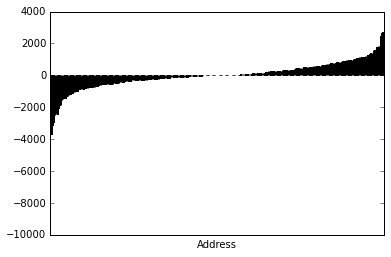

In [18]:
# calculate predictions for the data set and plot errors
predictions = lm.predict(X)
errors = predictions-y
errors.name = 'Error'
zip(data.index,y,predictions,errors)

# visualize the relationship between the features and the response using scatterplots
errors.sort()

errors.plot(kind='bar').get_xaxis().set_ticks([])

data size pre categories: 283
data size grouped: 55


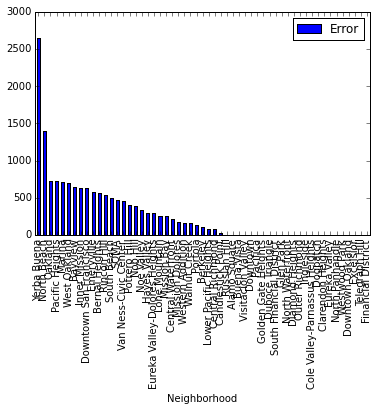

In [19]:
# show errors by neighborhood to see if there are any neighborhoods with funky differences

hooderrors = data[['Neighborhood']]
print "data size pre categories: " + `len(hooderrors)`

errors = predictions-y
errors.name = 'Error'

hooderrors = pd.concat([hooderrors,errors.abs()],axis=1)

hood_group = hooderrors.groupby('Neighborhood')
print "data size grouped: " + `len(hood_group)`

import numpy
def median(lst):
    return numpy.median(numpy.array(lst))

error_avg = hood_group.median()
error_avg.sort(columns='Error',ascending=False).plot(kind='bar')

data size pre categories: 283
data size grouped: 5


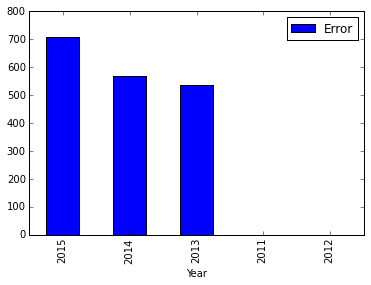

In [20]:
# show errors by year to see if there are any years with funky differences

yearerrors = data[['Year']]

yearerrors = pd.concat([yearerrors,errors.abs()],axis=1)
print "data size pre categories: " + `len(yearerrors)`

year_group = yearerrors.groupby('Year')
print "data size grouped: " + `len(year_group)`
error_avg = year_group.mean()
error_avg.sort(columns='Error',ascending=False).plot(kind='bar')